In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1-outlier_ratio))
num_outliers = num_samples - num_inliers

In [4]:
x_0 = np.random.randn(num_inliers//3, num_dimensions) - 4
x_1 = np.random.randn(num_inliers//3, num_dimensions) + 4
x_2 = np.random.randn(num_inliers//3, num_dimensions) + 4

# Add outliers sampled from a random uniform distribution
x = np.r_[x_0, x_1, x_2, np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))]

# Generate labels, 1 for inliers and -1 for outliers
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

## Applying sklearn.neighbors.LocalOutlierFactor

In [5]:
from sklearn.neighbors import LocalOutlierFactor

classifier = LocalOutlierFactor(n_neighbors=100)
y_pred = classifier.fit_predict(x)

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

AttributeError: 'LocalOutlierFactor' object has no attribute '_decision_function'

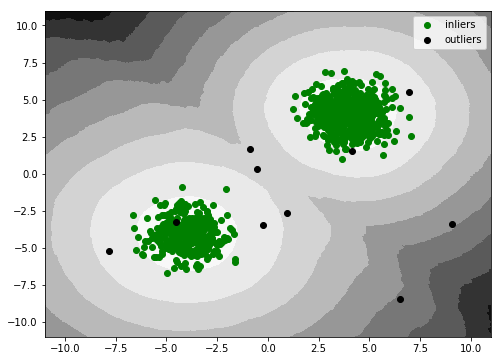

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Greys_r)

a = plt.scatter(x[:num_inliers, 0], x[:num_inliers, 1], c='green')
b = plt.scatter(x[num_inliers:, 0], x[num_inliers:, 1], c='black')

plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.legend([a, b],
           ["inliers","outliers"],
           numpoints=1)
plt.show()